In [5]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import dataframe_manip as hp
from fbprophet import Prophet
import pytz

%matplotlib notebook
import matplotlib.pyplot as plt

In [6]:
data = hp.csv_to_timeseries_df(filepath='../wifi_data_until_20190204.csv', timezone=pytz.timezone('US/Pacific'))

In [7]:
building_data = hp.get_daily_average(data, 'CLARK')

In [8]:
m = Prophet(yearly_seasonality=True)
m.fit(building_data)

/opt/conda/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
227,2019-03-02
228,2019-03-03
229,2019-03-04
230,2019-03-05
231,2019-03-06


In [10]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
227,2019-03-02,61.252922,41.395184,79.609221
228,2019-03-03,53.395358,32.974600,73.884290
229,2019-03-04,50.428834,31.236124,70.332066
230,2019-03-05,51.835069,33.584665,72.331606
231,2019-03-06,50.216838,31.367670,69.851678


<IPython.core.display.Javascript object>


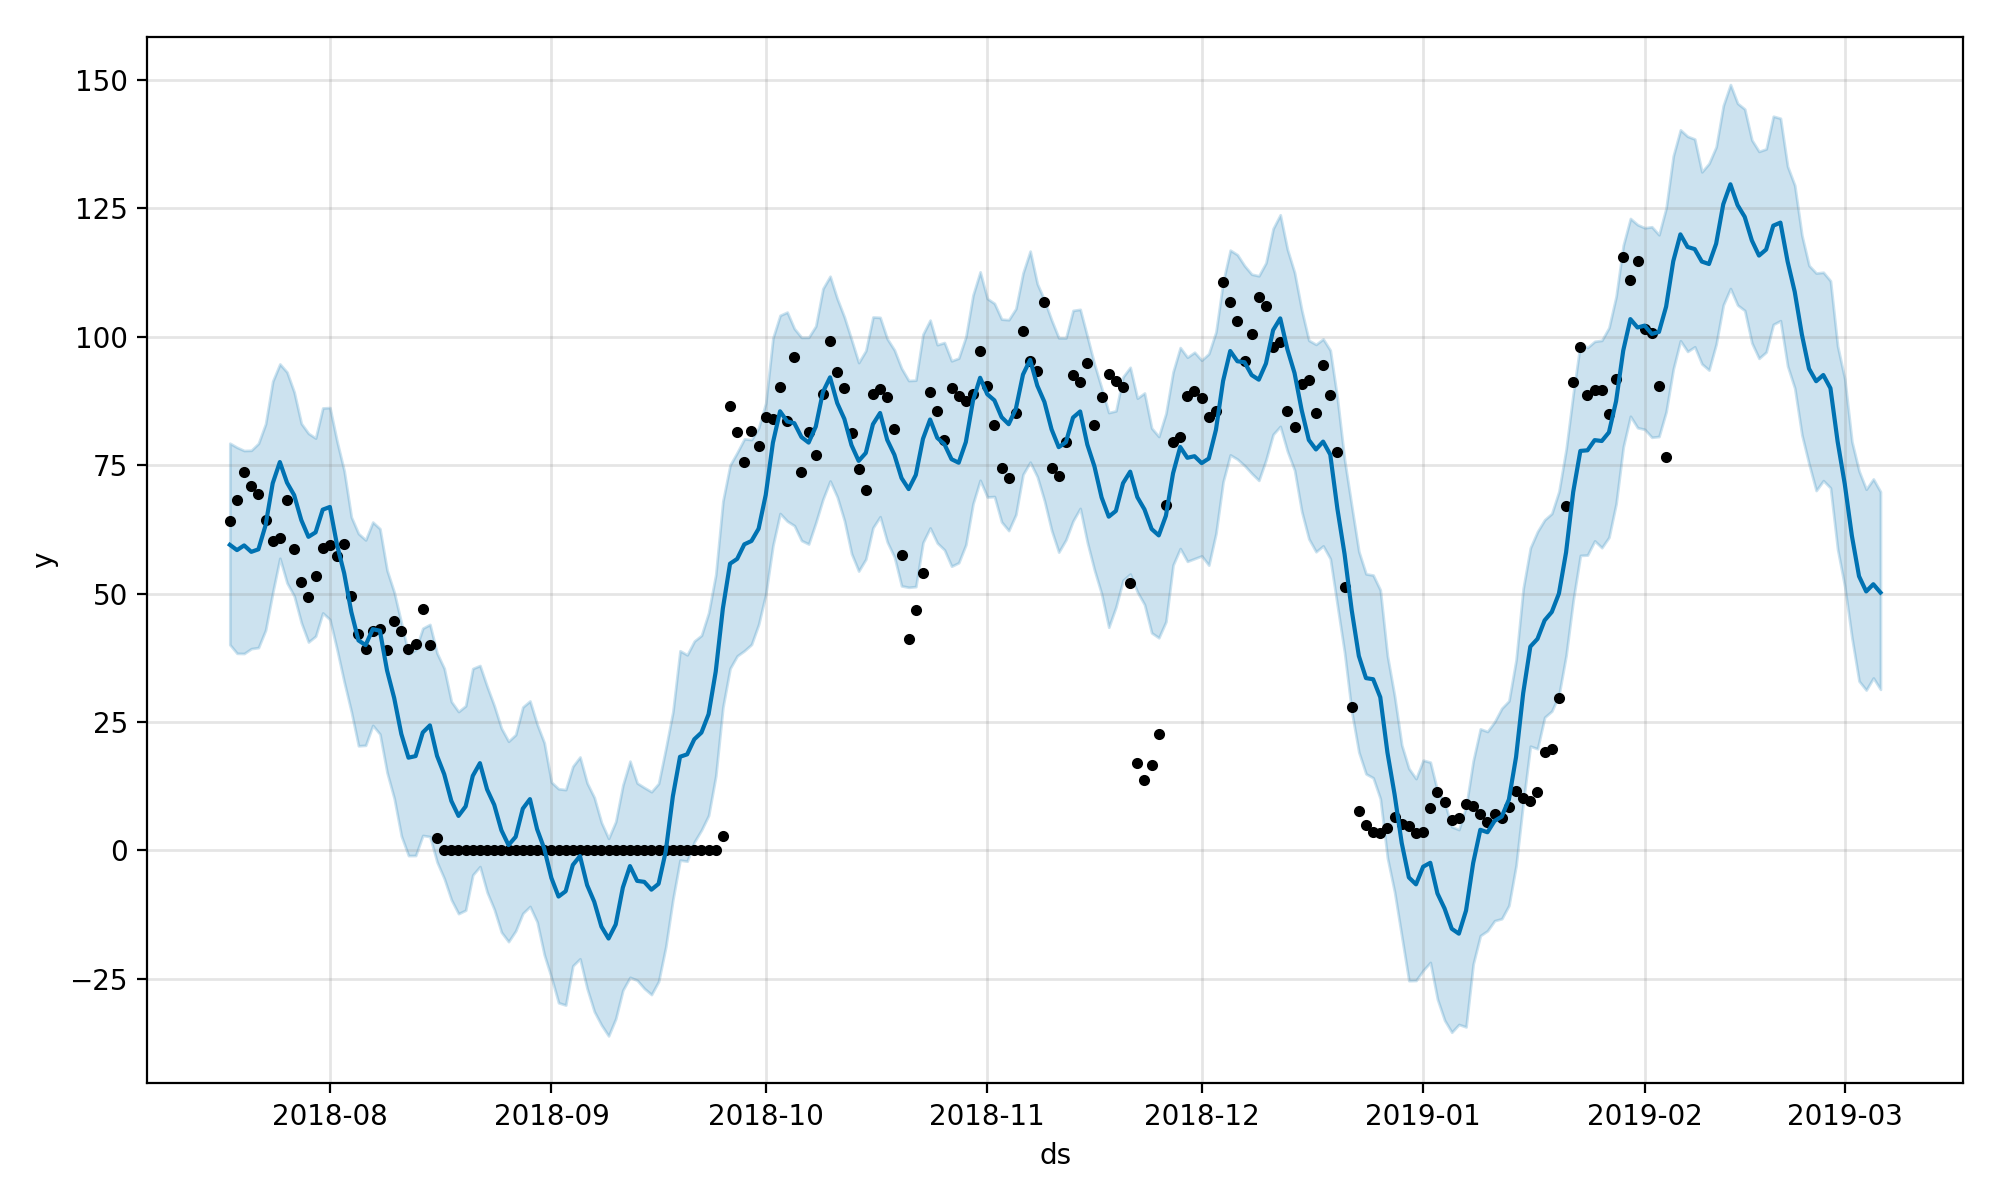

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [11]:
# Python
fig1 = m.plot(forecast)

<IPython.core.display.Javascript object>


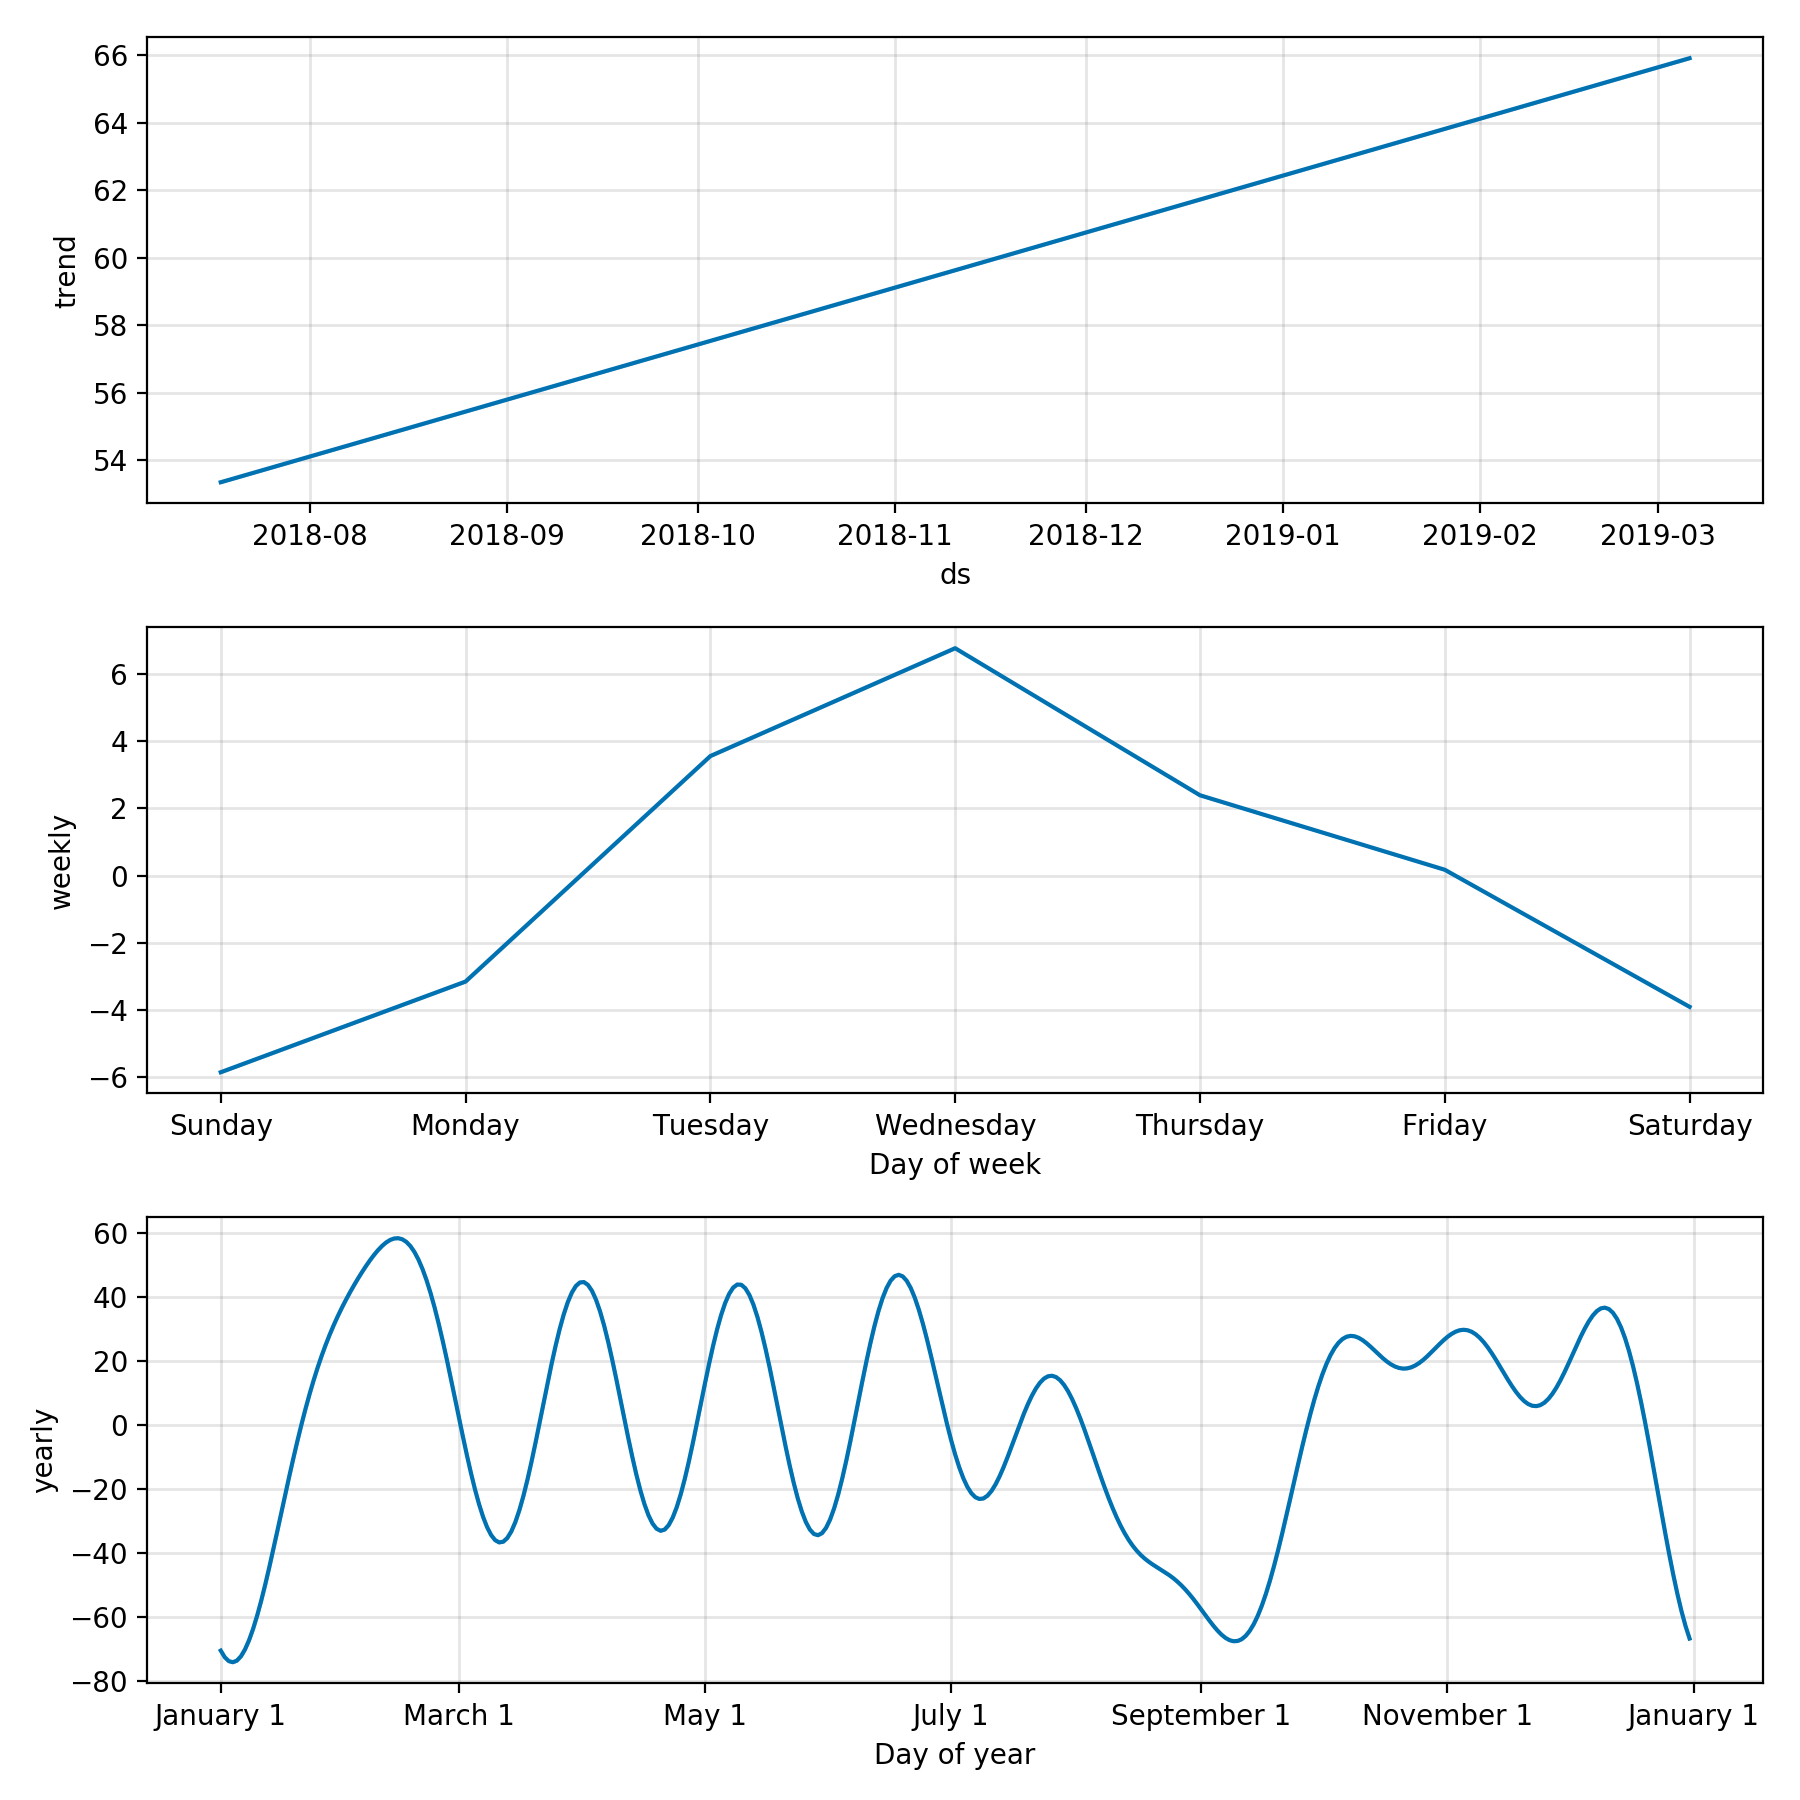

In [12]:
# Python
fig2 = m.plot_components(forecast)